## Introduction

- It's a Python based scientific computing package targeted at two sets of audiences:
     - A relacement for NumPy to use the power of GPUs
     - Deep learning research platform that provides maximum flexibility and speed
- pros:
     - Interactively debugging PyTorch. Many users who have used both frameworks would argue that makes pytorch significantly easier to debug and visualize.
     - Clean support for dynamic graphs
     - Organizational backing from Facebook
     - Blend of high level and low level APIs
- cons:
     - Much less mature than alternatives
     - Limited references / resources outside of the official documentation
- I accept you know neural network basics. If you do not know check my tutorial. Because I will not explain neural network concepts detailed, I only explain how to use pytorch for neural network
- Neural Network tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
- The most important parts of this tutorial from matrics to ANN. If you learn these parts very well, implementing remaining parts like CNN or RNN will be very easy.

**Content:**
- Basics of Pytorch
     - Matrices
     - Math
     - Variable
- Linear Regression
- Logistic Regression
- Artificial Neural Network (ANN)
- Concolutional Neural Network (CNN)

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the '../input/' directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir('../input'))

# Any results you write to the current directory are saved as output.

['digit-recognizer']


## Basics of Pytorch

### Matrics
- In pytorch, matrix(array) is called tensors.
- 3*3 matrix koy. This is 3*3 Tensor
- Lets look at array example with numpy that we already know.
     - We create numpy array with np.numpy() method
     - Type(): type of the array. In this example it is numpy
     - np.shape(): shape of the array. Row x Column

In [7]:
# import numpy library
import numpy as np

# numpy array
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print('Array Type: {}'.format(type(first_array))) # type
print('Array Shape: {}'.format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


- We looked at numpy array
- Now examine how we implement tensor(pytorch array)
- import pytorch library with import torch
- We create tensor with torch.Tensor() method
- type: type of the array. In this example it is tensor
- shape: shape of the array. Row x Column

In [8]:
# import pytorch library
import torch

# pytorch array
tensor = torch.Tensor(array)
print('Array Type: {}'.format(tensor.type))
print('Array Shape: {}'.format(tensor.shape))
print(tensor)

Array Type: <built-in method type of Tensor object at 0x7f2d52eedcd0>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


- Allocation is one of the most used technique in coding. Therefore lets learn how to make it with pytorch.
- In order to learn, compare numpy and tensor
     - np.ones() = torch.ones()
     - np.random.randn() = torch.rand()

In [9]:
# numpy ones
print('Numpy\n{}\n'.format(np.ones((2,3))))

# pytorch ones
print(torch.ones((2,3)))

Numpy
[[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [10]:
# numpy random
print('Numpy\n{}\n'.format(np.random.randn(2,3)))

# pytorch random
print(torch.rand(2,3))

Numpy
[[ 0.83548707 -0.04307565  0.73428138]
 [ 0.38345952  0.48202276 -0.43044361]]

tensor([[0.1086, 0.0525, 0.5754],
        [0.1073, 0.4098, 0.7564]])


- Even if when i use pytorch for neural networks, I feel better if I use numpy. Therefore, usually convert result of neural network that is tensor to numpy array to visualize or examine.

- Lets look at conversion between tensor and numpy arrays.
    - torch.from_numpy() : from numpy to tensor
    - numpy(). from tensor to numpy

In [11]:
# random numpy array
array = np.random.randn(2,2)
print('{} {}\n'.format(type(array),array))

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print('{}\n'.format(from_numpy_to_tensor))

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print('{} {}'.format(type(from_tensor_to_numpy), from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.15189895 0.38435319]
 [1.10967146 0.90439168]]

tensor([[0.1519, 0.3844],
        [1.1097, 0.9044]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.15189895 0.38435319]
 [1.10967146 0.90439168]]


### Basic Math with Pytorch
- Resize: view()
- a and b are tensor.
- Addition : torch.add(a,b) = a + b
- Subraction : a.sub(b) = a - b
- Element wise multiplication : torch.mul(a,b) = a*b
- Element wise division : torch.div(a,b) = a/b
- Mean : a.mean()
- Standard Deviation (std) : a.std()

In [12]:
# create tensor
tensor = torch.ones(3,3)
print(tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [13]:
# Resize
print('{}\n{}'.format(tensor.view(9), tensor.view(9).shape))

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])
torch.Size([9])


In [14]:
# Addition
print('Addition: {}'.format(torch.add(tensor, tensor)))

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


In [15]:
# Subtraction
print('Subtraction: {}'.format(tensor.sub(tensor)))

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [16]:
# Element wise multiplication
print('Element wise multipllication : {}'.format(torch.mul(tensor,tensor)))

Element wise multipllication : tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [17]:
# Element wise division
print('Element wise Division : {}'.format(torch.div(tensor,tensor)))

Element wise Division : tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [18]:
# Mean
tensor = torch.Tensor([1,2,3,4,5])
print('Mean : {}'.format(tensor.mean()))

Mean : 3.0


In [19]:
# Standard deviation (std)
print('std : {}'.format(tensor.std()))

std : 1.5811388492584229


### Variable
  - It accumulates gradients.
  - We will use pytorch in neural network. And as you know, in neural network we have backpropagation where gradients are calculated. Therefore we need to handle gradients. If you do not know neural network, check my deep learning tutorial first because I will not explain detailed the concepts like optimization, loss function or backpropagation.
  - Difference between variables and tensor is variable acccumulates gradients.
  - We can make math operations with variables, too.
  - In order to make backward propagation we need variables

In [20]:
# import variable from pytorch library
from torch.autograd import Variable

# define variable
var = Variable(torch.ones(3), requires_grad=True)
var

tensor([1., 1., 1.], requires_grad=True)

- Assume we have equation y = x^2
- Define x = [2,4] variable
- After calculation we find that y = [4,16](y=x^2)
- Recap o equation is that o = (1/2)sum(y) = (1/2)sum(x^2)
- deriavative of o = x
- Result is equal to x so gradients are [2,4]
- Lets implement

In [21]:
# lets make basic backward propagation
# we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print('y= ',y)

y=  tensor([ 4., 16.], grad_fn=<PowBackward0>)


In [22]:
# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print('o= ',o)

o=  tensor(10., grad_fn=<MulBackward0>)


In [23]:
# backward
o.backward() # calculates gradients

In [24]:
# As I defined, variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print('gradients: ',x.grad)

gradients:  tensor([2., 4.])


### Linear Regression
- Detailed linear regression tutorial is in my machine learning tutorial in part 'Regression'. I will not explain it in here detailed.
- y = Ax + B.
    - A = slope of curve
    - B = bias (point that intersect y-axis)
- For example, we have car company. If the car price is low, we sell more car. If the car price is high, we sell less car. This is the fact that we know and we have data set about this fact.
- The question is that what will be number of car sell if the car price is 100.

In [25]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array, dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_np

array([[3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]], dtype=float32)

In [26]:
car_price_tensor = Variable(torch.from_numpy(car_price_np))
car_price_tensor

tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [27]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [28]:
# lets define number of car sell
number_of_car_sell_array = np.arange(7.5,4,-0.5)

In [29]:
number_of_car_sell_array

array([7.5, 7. , 6.5, 6. , 5.5, 5. , 4.5])

In [30]:
number_of_car_sell_np = np.array(number_of_car_sell_array, dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_np

array([[7.5],
       [7. ],
       [6.5],
       [6. ],
       [5.5],
       [5. ],
       [4.5]], dtype=float32)

In [31]:
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

In [32]:
number_of_car_sell_tensor

tensor([[7.5000],
        [7.0000],
        [6.5000],
        [6.0000],
        [5.5000],
        [5.0000],
        [4.5000]])

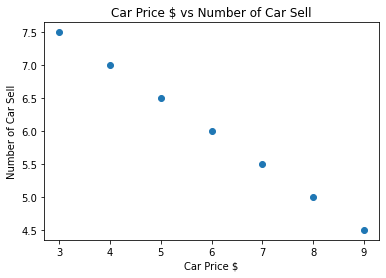

In [33]:
# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array, number_of_car_sell_array)
plt.xlabel('Car Price $')
plt.ylabel('Number of Car Sell')
plt.title('Car Price $ vs Number of Car Sell')
plt.show()

- Now this plot is our collected data
- We have a question that is what will be number of car sell if the car price is 100$
- In order to solve this question we need to use linear regression
- We need to line fit into this data. Aim is fitting line with minimum error.
- **Steps of Linear Regression**
    1. create LinearRegression class
    2. define model from this LinearRegression class
    3. MSE: Mean Squared Error
    4. Optimization (SGD: Stochastic Gradient Descent)
    5. Backpropagation
    6. Prediction
- Lets implement it with Pytorch

In [34]:
# Linear Regression with PyTorch

# Libraries
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings('ignore')

# create class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        # super function. It inherits from nn.Module and we can access everything in nn.Module
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)

In [35]:
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim) # input and output size are 1
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [36]:
# MSE
mse = nn.MSELoss()
mse

MSELoss()

In [37]:
# Optimization (find parameters that minimize error)
learning_rate = 0.02 # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.02
    momentum: 0
    nesterov: False
    weight_decay: 0
)

epoch 0, loss 39.69289016723633
epoch 50, loss 5.168168067932129
epoch 100, loss 3.4923479557037354
epoch 150, loss 2.3599257469177246
epoch 200, loss 1.5947006940841675
epoch 250, loss 1.0776053667068481
epoch 300, loss 0.7281833291053772
epoch 350, loss 0.49206382036209106
epoch 400, loss 0.33250826597213745
epoch 450, loss 0.22468996047973633
epoch 500, loss 0.1518322378396988
epoch 550, loss 0.10259906202554703
epoch 600, loss 0.06933042407035828
epoch 650, loss 0.046849459409713745
epoch 700, loss 0.031658198684453964
epoch 750, loss 0.02139262855052948
epoch 800, loss 0.014455857686698437
epoch 850, loss 0.009768643416464329
epoch 900, loss 0.0066011506132781506
epoch 950, loss 0.0044607436284422874
epoch 1000, loss 0.0030143577605485916


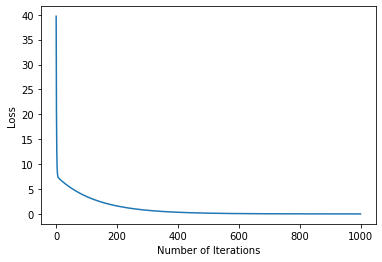

In [38]:
# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
    # optimization
    optimizer.zero_grad()
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # Backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

        
plt.plot(range(iteration_number), loss_list)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

- Number of iteration is 1001.
- Loss is almost zero that you can see from plot or loss in epoch number 1000
- Now we have a trained model
- While usign trained model, lets predict car prices.

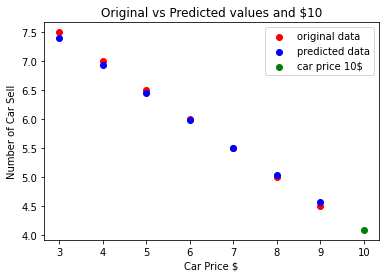

In [39]:
# predict our car price
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, number_of_car_sell_array, label='original data',color='red')
plt.scatter(car_prices_array, predicted, label='predicted data',color='blue')

# predict if car price is 10$, what will be the number of car sell
predicted_10 = model(torch.from_numpy(np.array([10], dtype=np.float32))).data.numpy()
plt.scatter(10, predicted_10.data, label='car price 10$', color='green')

plt.legend()
plt.xlabel('Car Price $')
plt.ylabel('Number of Car Sell')
plt.title('Original vs Predicted values and $10')
plt.show()

### Logistic Regression
- Linear regression is not good at classification
- We use logistic regression for classification
- linear regression + logistic function(softmax) = logistic regression
- Check my deep learning tutorial. There is detailed explanation of logistic regression.
- **Steps of Logistic Regression**
    1. Import Libraries
    2. Prepare Dataset
        - We use MNIST dataset.
        - There are 28*28 images and 10 labels from 0 to 9
        - Data is not normalized so we divide each image to 255 that is basic normalization for images
        - In order to split data, we use train_test_split method from sklearn library
        - Size of train data is 80% and size of test data is 20%
        - Create feature and target tensors. At the next parts we create variable from these tensors. As you remember we need to define variable for accumulation of gradients.
        - batch_size = batch size means is that for example we have data and it includes 1000 samples. We can train 1000 samples in a same time or we can divide it 10 groups which include 100 sample and train 10 groups in order. Batch size is the group size. For example, I choose batch_size = 100, that means in order to train all data only once we have 336 groups. We train each groups(336) that have batch_size(quota) 100. Finally we train 33600 sample one time.
        - epoch : 1epoch means training all samples one time.
        - In our example: we have 33600 sample to train and we decide our batch_size is 100. Also we decide epoch is 29(accuracy achieves almost highest value when epoch is 29). Data is trained 29 times. Question is that how many iteration do I need? Let's calculate:
            - training data 1 times = training 33600 sample (because data includes 33600 sample)
            - But we split our data 336 groups(group_size = batch_size = 100) our data
            - Therefore, 1 epoch(training data only once) tackes 336 iteration
            - We have 29 epoch, so total iteration is 9744(that is almost 10000 which I used)
        - TensorDataset(): Data set wrapping tensors. Each sample is retrieved by indexing tensors along the first dimension.
        - DataLoader() : It combines dataset and sample. It also provides multi process iterators over the dataset.
        - Visualize one of the images in in dataset
    3. Create Logistic Regression model
        - Same with linear regression
        - However as you expect, there should be logistic function in model right?
        - In pytorch, logistic function is in the loss function where we will use at next parts.
    4. Instantiate Model
        - input_dim = 28x28 # size of image pixel
        - output_dim = 10 # labels 0,1,2,3,4,5,6,7,8,9
        - create model
    5. Instantiate Loss
        - Cross entropy loss
        - It calculates loss that is not surprise
        - It also has softmax(logistic function) in it.
    6. Instantiate Optimizer
        - SGD Optimizer
    7. Training the Model
    8. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy(almost 85%) is increasing and our model is learning(trainig).

In [40]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

In [41]:
# Prepare Dataset
# Load data
train = pd.read_csv('../input/digit-recognizer/train.csv',dtype=np.float32)
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != 'label'].values/255 #normalization


In [43]:
targets_numpy

array([1., 0., 1., ..., 7., 6., 9.], dtype=float32)

In [44]:
targets_numpy.shape

(42000,)

In [45]:
features_numpy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
features_numpy.shape

(42000, 784)

In [47]:
# train test split. Size of train data is 80% and size of test data is 20%
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy, targets_numpy, test_size=0.2, random_state=42)

In [48]:
print(features_train.shape, features_train.dtype)

(33600, 784) float32


In [49]:
print(targets_train.shape, targets_train.dtype)

(33600,) float32


In [50]:
print(features_test.shape, features_test.dtype)

(8400, 784) float32


In [51]:
print(targets_test.shape, targets_test.dtype)

(8400,) float32


In [52]:
# create feature and target tensor for train set. As you remember we need variable to accumulate gradients.
# Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long



In [53]:
# create feature and target tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is Long


In [54]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000 
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [55]:
num_epochs

29

In [56]:
# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

In [57]:
train

In [58]:
# data loader
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

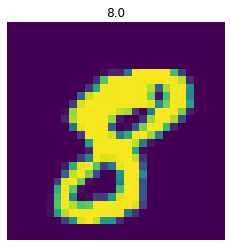

In [59]:
# visualize one of the images in dataset
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis('off')
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [60]:
features_numpy[1].shape

(784,)

In [61]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        # There should be logistic function right?
        # However logistic function in pytorch is in loss function
        # so actually we do not forget to put it, it is only at next parts
    def forward(self,x):
        out = self.linear(x)
        return out
    
# Instantiate Model Class
input_dim = 28*28 
output_dim = 10

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [62]:
temp = torch.rand(1,3)
temp

tensor([[0.7349, 0.8162, 0.2990]])

In [63]:
torch.max(temp, 0)

torch.return_types.max(
values=tensor([0.7349, 0.8162, 0.2990]),
indices=tensor([0, 0, 0]))

In [64]:
torch.max(temp, 1)[1]

tensor([1])

In [65]:
# Training the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of lables
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration : {} Loss : {} Accuracy : {}%'.format(count, loss.data, accuracy))
            
        
        

Iteration : 500 Loss : 1.8123512268066406 Accuracy : 65.39286041259766%
Iteration : 1000 Loss : 1.6033560037612915 Accuracy : 74.22618865966797%
Iteration : 1500 Loss : 1.296076774597168 Accuracy : 77.5952377319336%
Iteration : 2000 Loss : 1.195251226425171 Accuracy : 79.38095092773438%
Iteration : 2500 Loss : 1.038705587387085 Accuracy : 80.64286041259766%
Iteration : 3000 Loss : 0.9385865926742554 Accuracy : 81.70237731933594%
Iteration : 3500 Loss : 0.897346019744873 Accuracy : 82.4047622680664%
Iteration : 4000 Loss : 0.7525863647460938 Accuracy : 82.97618865966797%
Iteration : 4500 Loss : 0.9700729846954346 Accuracy : 83.35713958740234%
Iteration : 5000 Loss : 0.8087308406829834 Accuracy : 83.69047546386719%
Iteration : 5500 Loss : 0.7596353888511658 Accuracy : 84.02381134033203%
Iteration : 6000 Loss : 0.8501907587051392 Accuracy : 84.38095092773438%
Iteration : 6500 Loss : 0.6649263501167297 Accuracy : 84.58333587646484%
Iteration : 7000 Loss : 0.7092347145080566 Accuracy : 84.7

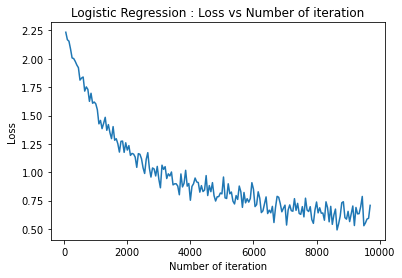

In [66]:
# visualization
plt.plot(iteration_list, loss_list)
plt.xlabel('Number of iteration')
plt.ylabel('Loss')
plt.title('Logistic Regression : Loss vs Number of iteration')
plt.show()

### Artifical Neural Network (ANN)
- Logistic regression is good at classification but when complexity(non linearity) increases, the accuracy of model decreases.
- Therefore, we need to increase complexity of model.
- In order to increase complexity of model, we need to add more non linear functions as hidden layer.
- I am saying again that if you do not know what is artificial neural network check my deep learning tutorial because i will not explain neural network detailed here, only explain pytorch.
- What we expect from artificial neural network is that when complexity increases, we use more hidden layers and our model can adapt better. As a result accuracy increase.
- **Steps of ANN:**
    1. Import Libraries
        - In order to show you, I import again but we actually imported them at previous parts.
    2. Prepare Dataset
        - Totally same with previous part(logistic regression).
        - We use same dataset so we only need train_loader and test_loader.
        - We use same batch size, epoch and iteration numbers.
    3. Create ANN Model
        - We add 3 hidden layers.
        - We use ReLU, Tanh and ELU activation functions for diversity.
    4. Instantiate Model Class
        - input_dim = 28x28
        - output_dim = 10
        - Hidden layer dimension is 150. I only choose it as 150 there is no reason. Actually hidden layer dimension is hyperparameter and it should be chosen and tuned. You can try different values for hidden layer dimension and observe the reesults.
        - create model
    5. Instantiate Loss
        - Cross entropy loss
        - It also has softmax(logistic function) in it.
    6. Instantiate Optimizer
        - SGD Optimizer
    7. Training the Model
    8. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning(training).
- Thanks to hidden layers model learn better and accuracy(almost 95%) is better than accuracy of logistic regression model.

In [67]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [70]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
    
        # Linear function 1 : 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2 : 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3 : 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout) : 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self,x):
        # Linear function 1
        out = self.fc1(x)
        # Non-Linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-Linearity 2
        out = self.tanh2(out)
        
        # Linear function 3
        out = self.fc3(out)
        out = self.elu3(out)
        
        # Linear function 4
        out = self.fc4(out)
        return out
    
# instantiate ANN
input_dim = 28*28
hidden_dim = 150 # hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [72]:
# ANN Model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(-1,28*28))
                
                # Forward Propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            
        if count % 500 == 0:
            # Print Loss
            print('Iteration : {}, Loss : {}, Accuracy : {}%'.format(count, loss.data, accuracy))
            
        

Iteration : 500, Loss : 0.3533182144165039, Accuracy : 89.77381134033203%
Iteration : 1000, Loss : 0.2593143582344055, Accuracy : 91.0%
Iteration : 1500, Loss : 0.14634856581687927, Accuracy : 91.52381134033203%
Iteration : 2000, Loss : 0.21039514243602753, Accuracy : 92.5952377319336%
Iteration : 2500, Loss : 0.2559516727924347, Accuracy : 93.71428680419922%
Iteration : 3000, Loss : 0.09637323021888733, Accuracy : 94.22618865966797%
Iteration : 3500, Loss : 0.20106105506420135, Accuracy : 94.60713958740234%
Iteration : 4000, Loss : 0.043670013546943665, Accuracy : 95.05952453613281%
Iteration : 4500, Loss : 0.22983664274215698, Accuracy : 95.21428680419922%
Iteration : 5000, Loss : 0.08020436018705368, Accuracy : 95.54762268066406%
Iteration : 5500, Loss : 0.17373622953891754, Accuracy : 95.4047622680664%
Iteration : 6000, Loss : 0.15050430595874786, Accuracy : 95.60713958740234%
Iteration : 6500, Loss : 0.09264674037694931, Accuracy : 96.07142639160156%
Iteration : 7000, Loss : 0.084

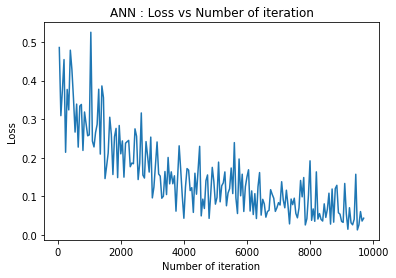

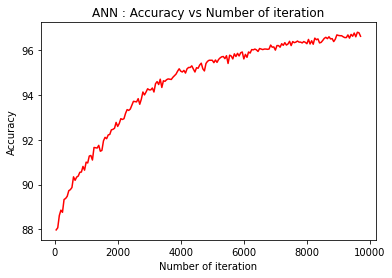

In [73]:
# visualization loss
plt.plot(iteration_list, loss_list)
plt.xlabel('Number of iteration')
plt.ylabel('Loss')
plt.title('ANN : Loss vs Number of iteration')
plt.show()

# visualization accuracy
plt.plot(iteration_list, accuracy_list, color='red')
plt.xlabel('Number of iteration')
plt.ylabel('Accuracy')
plt.title('ANN : Accuracy vs Number of iteration')
plt.show()

### Convolutional Neural Network (CNN)
- CNN is well adapted to classify images.
- **Steps of CNN:**
    1. Import Libraries
    2. Prepare Dataset
        - Totally same with previous parts
        - We use same dataset so we only need train_loader and test_loader
    3. Convolutional Layer:
        - Create feature maps with filters(kernels)
        - Padding : After applying filter, dimensions of original image decreases. However, we want to preserve as much as information about the original image. we can apply padding to increase dimension of feature map after convolutional layer.
        - We use 2 convolutional layer.
        - Number of feature map is out_channels = 16
        - Filter(kernel) size is 5*5
    4. Pooling Layer:
        - Prepares a condensed feature map from output of convolutional layer(feature map)
        - 2 pooling layer that we will use max pooling
        - Pooling size is 2*2
    5. Flattening: Flats the feature map
    6. Fully Connected Layer:
        - Artifiial Neural Network that we learn at previous part.
        - Or it can be oly linear like logistic regression but at the end there is always softmax function.
        - We will not use activation function in fully connected layer.
        - You can think that our fully connected layer is logistic regression
        - We combine convolutional part and logistic regression to create our CNN Model
    7. Instantiate Model Class
        - create Model
    8. Instantiate Loss
        - Cross entropy loss
        - It also has softmax(logistic function) in it.
    9. Instantiate Optimizer
        - SGD Optimizer
    10. Training the Model
    11. Prediction
- As a result, as you can see from plot, while loss decreasing , accuracy is increasing and our model is learning(training)
- Thanks to convolutional layer, model learn better and accuracy(almost 98%) is better than accuracy of ANN. Actually while tuning hyperparameters, increase in iteration and expanding convolutional neural network can increase accuracy but it takes too much running time that we do not want at kaggle.
        

In [74]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [79]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4,10)
        
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)
        
        # Linear function (readout)
        out = self.fc1(out)
        
        return out
    
    
# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train)/batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

# Data Loader
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

# Create CNN
model = CNNModel()

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [80]:
# CNN Model trainig
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print loss
            print('Iteration : {}, Loss : {}, Accuracy : {}'.format(count, loss.data, accuracy))

Iteration : 500, Loss : 0.11408394575119019, Accuracy : 96.55952453613281
Iteration : 1000, Loss : 0.06350477039813995, Accuracy : 97.36904907226562
Iteration : 1500, Loss : 0.057248376309871674, Accuracy : 97.82142639160156
Iteration : 2000, Loss : 0.012870934791862965, Accuracy : 98.16666412353516


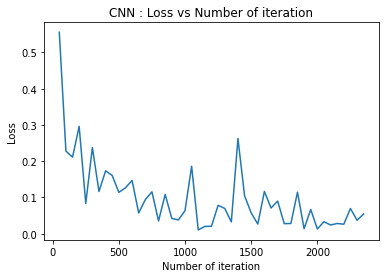

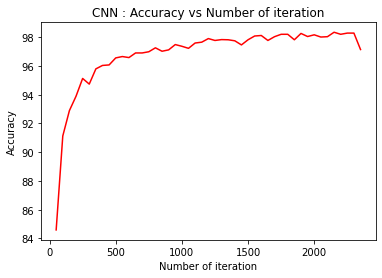

In [81]:
# Visualization loss
plt.plot(iteration_list, loss_list)
plt.xlabel('Number of iteration')
plt.ylabel('Loss')
plt.title('CNN : Loss vs Number of iteration')
plt.show()

# Visualization accuracy
plt.plot(iteration_list, accuracy_list, color='red')
plt.xlabel('Number of iteration')
plt.ylabel('Accuracy')
plt.title('CNN : Accuracy vs Number of iteration')
plt.show()

### Conclusion
In this tutorial, we learn :
1. Basics of pytorch
2. Linear regression with pytorch
3. Logistic regression with pytorch
4. Artificial neural network with pytorch
5. Convolutional neural network with pytorch